Lets`s read apache_logs  with known format. So, we can use regexp in separator

In [1]:
import re
import pandas as pd

df = pd.read_csv(
    'apache_logs',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'])

Got DataFrame

In [17]:
from IPython.display import display, HTML

display(HTML(df.loc[df['status'] == '200'].head().to_html()))

,ip,time,request,status,size,referer,user_agent
0,83.149.9.216,[17/May/2015:10:05:03 +0000],"""GET /presentations/logstash-monitorama-2013/images/kibana-search.png HTTP/1.1""",200,203023.0,"""http://semicomplete.com/presentations/logstash-monitorama-2013/""","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"""
1,83.149.9.216,[17/May/2015:10:05:43 +0000],"""GET /presentations/logstash-monitorama-2013/images/kibana-dashboard3.png HTTP/1.1""",200,171717.0,"""http://semicomplete.com/presentations/logstash-monitorama-2013/""","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"""
2,83.149.9.216,[17/May/2015:10:05:47 +0000],"""GET /presentations/logstash-monitorama-2013/plugin/highlight/highlight.js HTTP/1.1""",200,26185.0,"""http://semicomplete.com/presentations/logstash-monitorama-2013/""","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"""
3,83.149.9.216,[17/May/2015:10:05:12 +0000],"""GET /presentations/logstash-monitorama-2013/plugin/zoom-js/zoom.js HTTP/1.1""",200,7697.0,"""http://semicomplete.com/presentations/logstash-monitorama-2013/""","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"""
4,83.149.9.216,[17/May/2015:10:05:07 +0000],"""GET /presentations/logstash-monitorama-2013/plugin/notes/notes.js HTTP/1.1""",200,2892.0,"""http://semicomplete.com/presentations/logstash-monitorama-2013/""","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/32.0.1700.77 Safari/537.36"""


Filtering dataframe by column status with value = 404

In [3]:
counted = df.loc[df['status'] == '404']['ip'].value_counts()

And printing 10, 20 top lines of them

In [4]:
counted.head(10)

208.91.156.11     60
144.76.95.39      14
66.249.73.135      8
91.236.75.25       8
75.97.9.59         6
176.92.75.62       5
84.137.208.44      4
130.237.218.86     4
188.165.243.45     3
198.245.61.43      3
Name: ip, dtype: int64

In [5]:
counted.head(20)

208.91.156.11      60
144.76.95.39       14
66.249.73.135       8
91.236.75.25        8
75.97.9.59          6
176.92.75.62        5
84.137.208.44       4
130.237.218.86      4
188.165.243.45      3
198.245.61.43       3
78.173.140.106      3
195.250.34.144      3
95.78.54.93         3
86.28.207.22        2
204.62.56.3         2
66.249.73.185       2
199.168.96.66       2
111.199.235.239     2
193.244.33.47       2
212.90.148.107      2
Name: ip, dtype: int64

Let`s make some investigations. Firstly, usual data statistic. Nothing interesting yet...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ip          10000 non-null  object 
 1   time        10000 non-null  object 
 2   request     10000 non-null  object 
 3   status      10000 non-null  object 
 4   size        9330 non-null   float64
 5   referer     9999 non-null   object 
 6   user_agent  9999 non-null   object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [8]:
df.describe(include=['object', 'bool'])

,ip,time,request,status,referer,user_agent
count,10000,10000,10000,10000,9999,9999
unique,1754,4363,1734,9,628,558
top,66.249.73.135,[17/May/2015:23:05:30 +0000],"""GET /favicon.ico HTTP/1.1""",200,"""-""","""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK..."
freq,482,9,747,9125,4072,1044


Lets check distribution of answer sise param of lines with status 404

In [40]:
status404_size = df.loc[df['status'] == '404']['size']

In [45]:
status404_size.describe()

count     205.000000
mean     1279.117073
std      2514.786836
min       289.000000
25%       303.000000
50%       324.000000
75%       364.000000
max      7865.000000
Name: size, dtype: float64

And something interesting is here:

<AxesSubplot:>

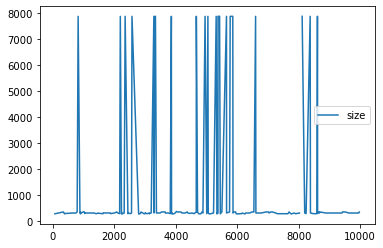

In [51]:
status404_size.plot(legend = True)

Size has not random distribution. It has several spikes. May be it`s important for understanding of 404 status reasons.
It needs more deep invastigation, including transformation of columns and finding they corellatoin to status column.